In [43]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from matplotlib.ticker import PercentFormatter
import geopandas as gpd

Cadastro Conta corrente


In [45]:
cadastro = pd.read_excel('/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_Cadastro_Conta_Digital.xlsx', sheet_name='Base_Cadastro_CC Digital')


In [46]:
cadastro.dropna(how='all', inplace=True)

In [47]:
ddd = pd.read_excel('/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/DDD.xlsx')


In [48]:
cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Data do Cadastro na Conta Digital                     512 non-null    datetime64[ns]
 1   ID_Lead                                               512 non-null    int64         
 2   DDD do Celular                                        512 non-null    int64         
 3   Qual a sua área de atuação?                           512 non-null    object        
 4   Qual o seu cargo atual?                               512 non-null    object        
 5   Quais seus objetivos com a conta digital da BR Bank?  512 non-null    object        
 6   Como você conheceu o BR Bank?                         512 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 28.1+ KB


In [49]:
ddd = ddd[['Prefixo', 'Estado']]

In [50]:
cadastro = cadastro.merge(ddd, how='left', left_on='DDD do Celular', right_on='Prefixo')

In [51]:
cadastro.head()

,Data do Cadastro na Conta Digital,ID_Lead,DDD do Celular,Qual a sua área de atuação?,Qual o seu cargo atual?,Quais seus objetivos com a conta digital da BR Bank?,Como você conheceu o BR Bank?,Prefixo,Estado
0,2022-09-01,1511,11,Economia/Administração ou Mercado Financeiro,Analista,Busco um banco em que possa confiar,Indicação,11,São Paulo
1,2022-09-02,5276,51,Tecnologia,Estou desempregado(a) no momento,Busco um banco em que possa confiar,Indicação,51,Rio Grande do Sul
2,2022-09-03,1504,31,Tecnologia,Estou desempregado(a) no momento,Busco um banco em que possa confiar,Indicação,31,Minas Gerais
3,2022-09-04,4998,61,Engenharia/Matemática/Estatística/Física,Analista,Busco um banco em que possa confiar,Indicação,61,Distrito Federal/Goiás
4,2022-09-04,5090,84,Tecnologia,Estudante ou Assistente,Busco um banco em que possa confiar,Indicação,84,Rio Grande do Norte


In [52]:
cadastro.drop(columns=['Prefixo'], inplace=True)

In [53]:
cadastro.columns = ['data do cadastro da conta digital', 'ID_lead', 'DDD do celular', 'área de atuação', 'cargo atual', 'objetivo da conta digital', 'como conheceu o BR Bank', 'Estado']

In [54]:
cadastro['mês da abertura'] = cadastro['data do cadastro da conta digital'].dt.to_period("M")

In [55]:
freq_abs = pd.DataFrame(cadastro['mês da abertura'].value_counts(sort=False))
freq_rel = pd.DataFrame(cadastro['mês da abertura'].value_counts(1, sort=False)*100)
freq_conta_digital = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conta_digital.columns = ['mês da abertura', 'Qtde', '%']
freq_conta_digital.round({'%': 2})


,mês da abertura,Qtde,%
0,2022-09,35,6.84
1,2022-10,60,11.72
2,2022-11,71,13.87
3,2022-12,98,19.14
4,2023-01,129,25.20
5,2023-02,119,23.24


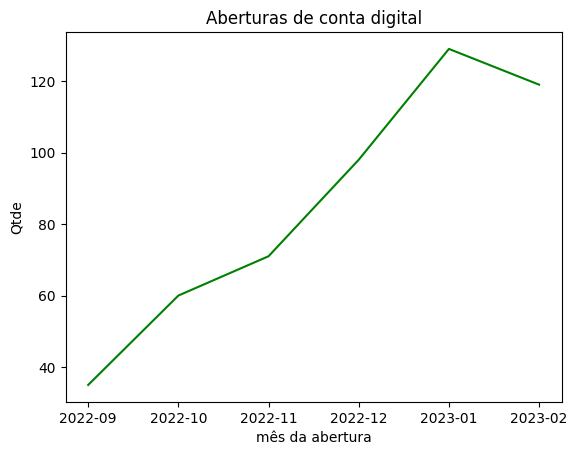

In [56]:
sns.lineplot(data=freq_conta_digital, x=freq_conta_digital["mês da abertura"].astype(str), y="Qtde", color='green', sort=False);
plt.title("Aberturas de conta digital");
plt.show();

In [57]:
cadastro.loc[cadastro['área de atuação']=='Pessoas / Recursos Humanos', 'área de atuação']='Recursos Humanos'

In [58]:
cadastro.loc[cadastro['área de atuação']=='Marketing / Publicidade', 'área de atuação']='Marketing/Publicidade'

In [59]:
cadastro.loc[cadastro['área de atuação']=='Atendimento ao cliente / Customer Experience', 'área de atuação']='Atendimento ao cliente / CX'

In [60]:
cadastro.loc[cadastro['área de atuação']=='Administração de Empresas', 'área de atuação']='Economia/Administração ou Mercado Financeiro'

In [61]:
cadastro.loc[cadastro['área de atuação']=='Economia', 'área de atuação']='Economia/Administração ou Mercado Financeiro'

In [62]:
cadastro.loc[cadastro['área de atuação']=='Mercado Financeiro', 'área de atuação']='Economia/Administração ou Mercado Financeiro'

In [63]:
cadastro['área de atuação'] = cadastro['área de atuação'].fillna("Não informado")

In [64]:
freq_abs = pd.DataFrame(cadastro['área de atuação'].value_counts())
freq_rel = pd.DataFrame(cadastro['área de atuação'].value_counts(1)*100).round(2)
freq_area_atuacao = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_area_atuacao.columns = ['área de atuação', 'Qtde', '%']
freq_area_atuacao


,área de atuação,Qtde,%
0,Economia/Administração ou Mercado Financeiro,123,24.02
1,Análise Dados / Ciência Dados / Estatística,85,16.60
2,Tecnologia,51,9.96
3,Logística,42,8.20
4,Engenharia,33,6.45
5,Comercial / Vendas,20,3.91
6,Atendimento ao cliente / CX,20,3.91
7,Marketing/Publicidade,19,3.71
8,Outros,18,3.52
9,Educação,16,3.12


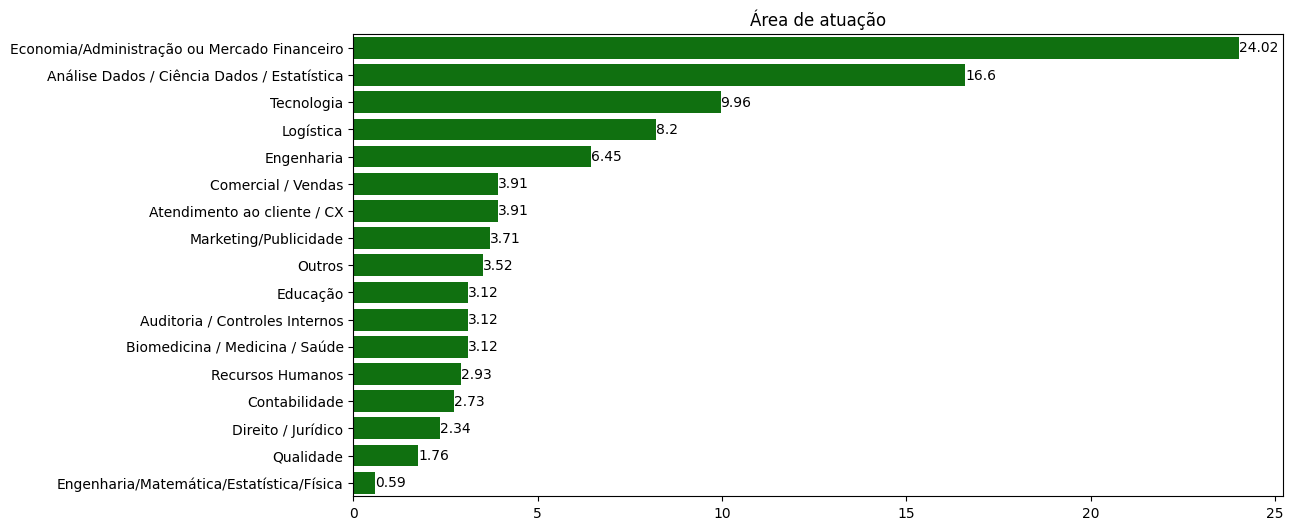

In [65]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_area_atuacao, x= "%", y= 'área de atuação', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title("Área de atuação")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [66]:
cadastro['cargo atual'] = cadastro['cargo atual'].fillna("Não informado")

In [67]:
freq_abs = pd.DataFrame(cadastro['cargo atual'].value_counts())
freq_rel = pd.DataFrame(cadastro['cargo atual'].value_counts(1)*100).round(2)
freq_cargo_atual = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cargo_atual.columns = ['cargo atual', 'Qtde', '%']
freq_cargo_atual


,cargo atual,Qtde,%
0,Analista,177,34.57
1,Estou desempregado(a) no momento,78,15.23
2,Assistente,61,11.91
3,Coordenador(a) / Gerente,55,10.74
4,Estudante,48,9.38
5,Especialista,30,5.86
6,Outros,29,5.66
7,Estudante ou Assistente,11,2.15
8,Diretor(a) / C-Level,10,1.95
9,Consultor,4,0.78


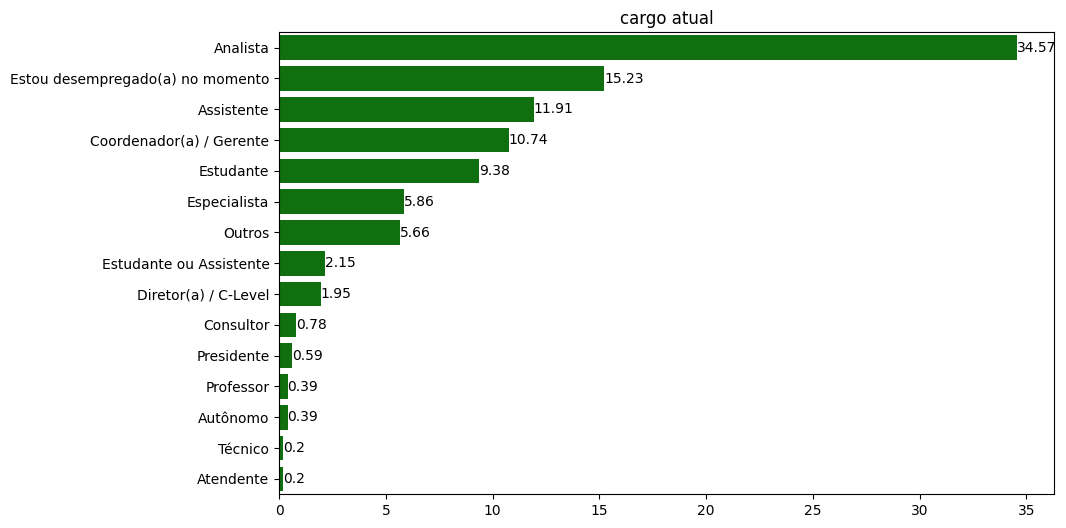

In [68]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=freq_cargo_atual, x= "%", y= 'cargo atual', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('cargo atual')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [69]:
freq_abs = pd.DataFrame(cadastro['objetivo da conta digital'].value_counts())
freq_rel = pd.DataFrame(cadastro['objetivo da conta digital'].value_counts(1)*100).round(2)
freq_objetivo = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_objetivo.columns = ['objetivo da conta digital', 'Qtde', '%']
freq_objetivo


,objetivo da conta digital,Qtde,%
0,Busco um banco em que possa confiar,352,68.75
1,Apenas para testar a conta,160,31.25


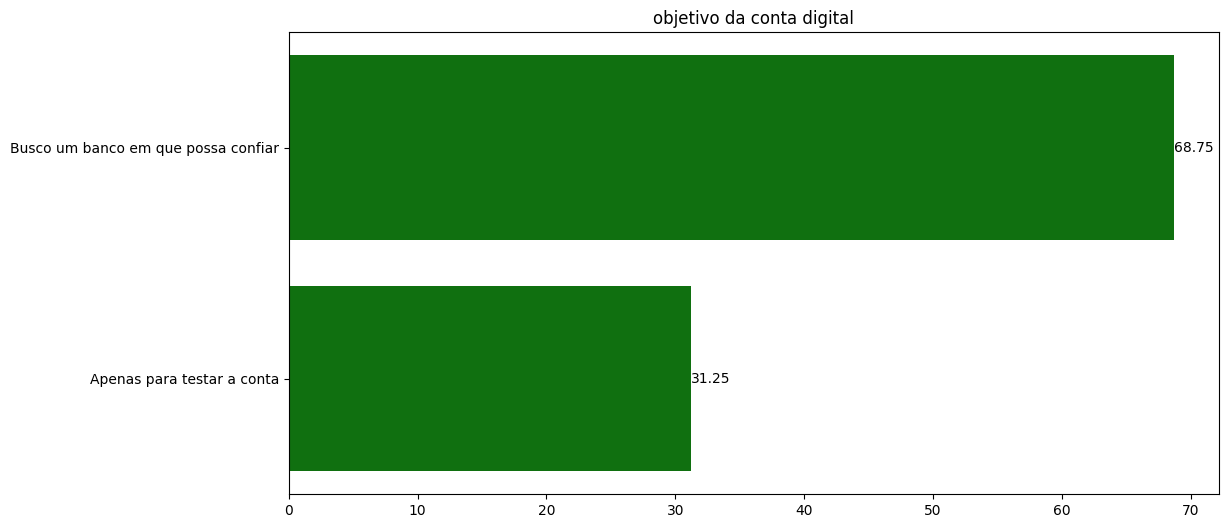

In [70]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_objetivo, x= "%", y= 'objetivo da conta digital', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('objetivo da conta digital')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [71]:
freq_abs = pd.DataFrame(cadastro['como conheceu o BR Bank'].value_counts())
freq_rel = pd.DataFrame(cadastro['como conheceu o BR Bank'].value_counts(1)*100).round(2)
freq_conheceu = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conheceu.columns = ['como conheceu o BR Bank', 'Qtde', '%']
freq_conheceu


,como conheceu o BR Bank,Qtde,%
0,Instagram,335,65.43
1,Indicação,98,19.14
2,Facebook,50,9.77
3,Google,13,2.54
4,Conta Salário,11,2.15
5,Youtube,5,0.98


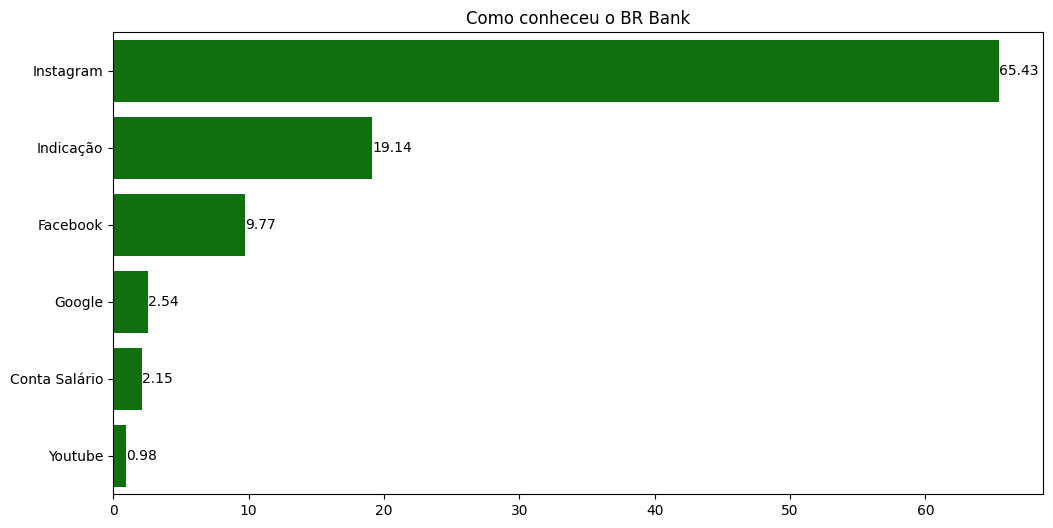

In [72]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_conheceu, x= "%", y= 'como conheceu o BR Bank', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Como conheceu o BR Bank')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [73]:
cadastro['Estado'].fillna("Estado não reconhecido", inplace=True)

In [74]:
cadastro['Estado'].value_counts(sort=False, dropna=False).reset_index()
freq_abs = pd.DataFrame(cadastro['Estado'].value_counts())
freq_rel = pd.DataFrame(cadastro['Estado'].value_counts(1)*100).round(2)
freq_estado = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_estado.columns = ['Estado', 'Qtde', '%']
freq_estado


,Estado,Qtde,%
0,São Paulo,183,35.74
1,Rio de Janeiro,62,12.11
2,Minas Gerais,49,9.57
3,Distrito Federal/Goiás,25,4.88
4,Ceará,23,4.49
5,Rio Grande do Sul,22,4.30
6,Bahia,22,4.30
7,Paraná,20,3.91
8,Pernambuco,13,2.54
9,Piauí,11,2.15


In [75]:
infos_ufs = gpd.read_file("/content/drive/MyDrive/Acelera/bcim_2016_21_11_2018.gpkg", layer="lim_unidade_federacao_a")

In [76]:
infos_ufs.rename({'nome': 'Estado'}, axis=1, inplace=True)

In [77]:
brasil = infos_ufs.merge(freq_estado, on= "Estado", how="left")

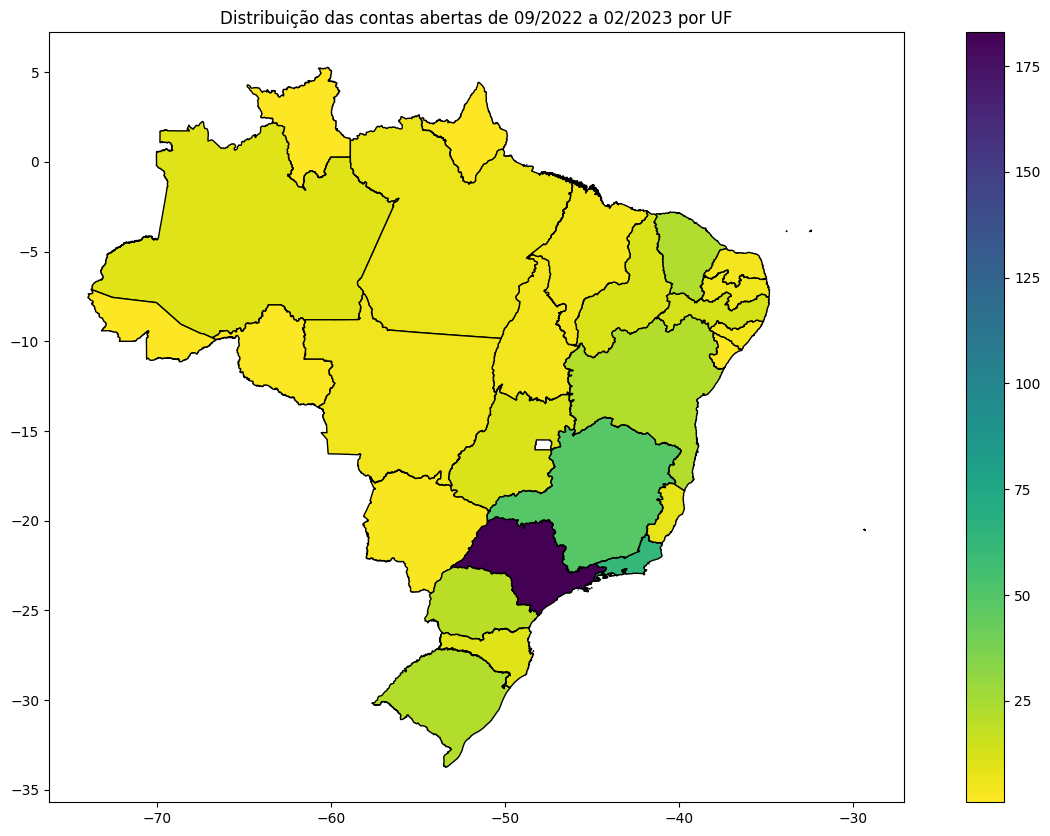

In [78]:
mapa_brasil = brasil.plot(column="Qtde", cmap="viridis_r", figsize=(16,10), legend=True, edgecolor='black')
plt.title("Distribuição das contas abertas de 09/2022 a 02/2023 por UF")
ax = mapa_brasil.plot()


In [79]:
cadastro.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_cadastro_conta_digital_tratada.xlsx", index=False)

## Análise Bivariada

In [80]:
cadastro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   data do cadastro da conta digital  512 non-null    datetime64[ns]
 1   ID_lead                            512 non-null    int64         
 2   DDD do celular                     512 non-null    object        
 3   área de atuação                    512 non-null    object        
 4   cargo atual                        512 non-null    object        
 5   objetivo da conta digital          512 non-null    object        
 6   como conheceu o BR Bank            512 non-null    object        
 7   Estado                             512 non-null    object        
 8   mês da abertura                    512 non-null    period[M]     
dtypes: datetime64[ns](1), int64(1), object(6), period[M](1)
memory usage: 40.0+ KB


In [81]:
freq_abs = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['área de atuação'].value_counts())
freq_rel = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['área de atuação'].value_counts(1)*100).round(2)
freq_objetivo = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_objetivo.columns = ['objetivo da conta digital', 'área de atuação','Qtde', '%']
freq_objetivo


,objetivo da conta digital,área de atuação,Qtde,%
0,Apenas para testar a conta,Economia/Administração ou Mercado Financeiro,34,21.25
1,Apenas para testar a conta,Análise Dados / Ciência Dados / Estatística,33,20.62
2,Apenas para testar a conta,Logística,16,10.00
3,Apenas para testar a conta,Engenharia,13,8.12
4,Apenas para testar a conta,Tecnologia,12,7.50
5,Apenas para testar a conta,Comercial / Vendas,8,5.00
6,Apenas para testar a conta,Atendimento ao cliente / CX,6,3.75
7,Apenas para testar a conta,Auditoria / Controles Internos,6,3.75
8,Apenas para testar a conta,Biomedicina / Medicina / Saúde,6,3.75
9,Apenas para testar a conta,Educação,5,3.12


In [82]:
freq_abs = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['cargo atual'].value_counts())
freq_rel = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['cargo atual'].value_counts(1)*100).round(2)
freq_cargo = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cargo.columns = ['objetivo da conta digital', 'cargo atual','Qtde', '%']
freq_cargo

,objetivo da conta digital,cargo atual,Qtde,%
0,Apenas para testar a conta,Analista,51,31.87
1,Apenas para testar a conta,Assistente,21,13.12
2,Apenas para testar a conta,Estou desempregado(a) no momento,21,13.12
3,Apenas para testar a conta,Coordenador(a) / Gerente,18,11.25
4,Apenas para testar a conta,Estudante,18,11.25
5,Apenas para testar a conta,Especialista,15,9.38
6,Apenas para testar a conta,Outros,11,6.88
7,Apenas para testar a conta,Diretor(a) / C-Level,3,1.88
8,Apenas para testar a conta,Consultor,1,0.62
9,Apenas para testar a conta,Professor,1,0.62


In [83]:
freq_abs = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['como conheceu o BR Bank'].value_counts())
freq_rel = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['como conheceu o BR Bank'].value_counts(1)*100).round(2)
freq_conheceu = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conheceu.columns = ['objetivo da conta digital', 'como conheceu o BR Bank','Qtde', '%']
freq_conheceu

,objetivo da conta digital,como conheceu o BR Bank,Qtde,%
0,Apenas para testar a conta,Instagram,120,75.00
1,Apenas para testar a conta,Facebook,18,11.25
2,Apenas para testar a conta,Indicação,12,7.50
3,Apenas para testar a conta,Conta Salário,5,3.12
4,Apenas para testar a conta,Google,5,3.12
5,Busco um banco em que possa confiar,Instagram,215,61.08
6,Busco um banco em que possa confiar,Indicação,86,24.43
7,Busco um banco em que possa confiar,Facebook,32,9.09
8,Busco um banco em que possa confiar,Google,8,2.27
9,Busco um banco em que possa confiar,Conta Salário,6,1.70


In [84]:
freq_abs = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['Estado'].value_counts())
freq_rel = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['Estado'].value_counts(1)*100).round(2)
freq_estado = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_estado.columns = ['objetivo da conta digital', 'Estado','Qtde', '%']
freq_estado

,objetivo da conta digital,Estado,Qtde,%
0,Apenas para testar a conta,São Paulo,62,38.75
1,Apenas para testar a conta,Rio de Janeiro,18,11.25
2,Apenas para testar a conta,Minas Gerais,12,7.50
3,Apenas para testar a conta,Ceará,9,5.62
4,Apenas para testar a conta,Goiás,8,5.00
5,Apenas para testar a conta,Bahia,6,3.75
6,Apenas para testar a conta,Santa Catarina,6,3.75
7,Apenas para testar a conta,Espírito Santo,4,2.50
8,Apenas para testar a conta,Pará,4,2.50
9,Apenas para testar a conta,Piauí,4,2.50
